In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np


In [2]:
#Import source data file

source_df = pd.read_csv('Mixed_Beverage_Gross_Receipts.csv')

source_df.head(5)


,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Location Number,Location Name,Location Address,...,Inside/Outside City Limits,TABC Permit Number,Responsibility Begin Date,Responsibility End Date,Obligation End Date,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,32052275016,"BMC STUDEMONT, L.L.C.",2450 LOUISIANA ST STE 400-935,HOUSTON,TX,77006.0,101,1,BEER MARKET CO,920 STUDEMONT ST STE 900,...,Y,MB869619,04/16/2014,NaN,01/31/2015,26664,4825,69957,0,101446
1,32061337625,"BISHOP, DORRIS, AND LEE LLC",3417 WICHITA ST,HOUSTON,TX,77004.0,101,2,PRESIDIO,911 W 11TH ST,...,Y,MB969024,01/13/2017,01/11/2019,11/30/2017,37824,37136,13945,0,88905
2,32059750532,"JL & JL ENTERPRISES, INC.",15015 TRAMORE DR,HOUSTON,TX,77083.0,79,1,DADDY O'S SPORT BAR,5830 SPENCER HWY,...,Y,MB945636,05/27/2016,NaN,12/31/2017,8542,150,9845,0,18537
3,12058962619,"POW ENTERPRISES, INC.",13703 WEST RD,HOUSTON,TX,77041.0,101,1,CRAZY FROGS BAR AND GRILL,13703 WEST RD,...,N,MB652298,02/22/2007,NaN,11/30/2007,33016,825,26071,0,59912
4,10206642059,"BCGN, INC.",1200 MCKINNEY ST STE 103,HOUSTON,TX,77010.0,101,1,DON PATRON BAR & GRILL,500 DALLAS ST STE P50,...,Y,MB536954,06/02/2003,03/17/2016,09/30/2013,5065,372,4465,0,9902


In [3]:
#Print column list

for col in source_df:
    print(col)

Taxpayer Number
Taxpayer Name
Taxpayer Address
Taxpayer City
Taxpayer State
Taxpayer Zip
Taxpayer County
Location Number
Location Name
Location Address
Location City
Location State
Location Zip
Location County
Inside/Outside City Limits
TABC Permit Number
Responsibility Begin Date
Responsibility End Date
Obligation End Date
Liquor Receipts
Wine Receipts
Beer Receipts
Cover Charge Receipts
Total Receipts


In [4]:
#Print source dataframe info

print(source_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374049 entries, 0 to 374048
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Taxpayer Number             374049 non-null  int64  
 1   Taxpayer Name               374049 non-null  object 
 2   Taxpayer Address            374049 non-null  object 
 3   Taxpayer City               374049 non-null  object 
 4   Taxpayer State              374016 non-null  object 
 5   Taxpayer Zip                374016 non-null  float64
 6   Taxpayer County             374049 non-null  int64  
 7   Location Number             374049 non-null  int64  
 8   Location Name               374049 non-null  object 
 9   Location Address            374049 non-null  object 
 10  Location City               374049 non-null  object 
 11  Location State              374049 non-null  object 
 12  Location Zip                374049 non-null  int64  
 13  Location Count

In [5]:
#Descripte source dataframe

source_df.describe()

,Taxpayer Number,Taxpayer Zip,Taxpayer County,Location Number,Location Zip,Location County,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
count,3.740490e+05,374016.000000,374049.000000,374049.000000,374049.000000,374049.000000,3.740490e+05,374049.000000,3.740490e+05,374049.000000,3.740490e+05
mean,2.237058e+10,73561.504347,86.717181,8.537681,77123.052643,97.699574,1.983798e+04,7899.737545,1.158526e+04,161.789044,3.957098e+04
std,8.214086e+09,13001.707315,41.243560,28.949669,174.966939,13.177308,3.591953e+04,23732.433574,2.868691e+04,2519.274335,6.947354e+04
min,1.010556e+10,2109.000000,0.000000,1.000000,77002.000000,20.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.741997e+10,77008.000000,79.000000,1.000000,77019.000000,101.000000,1.930000e+03,35.000000,1.083000e+03,0.000000,5.100000e+03
50%,1.760563e+10,77057.000000,101.000000,1.000000,77057.000000,101.000000,9.048000e+03,716.000000,4.554000e+03,0.000000,1.980700e+04
75%,3.204115e+10,77293.000000,101.000000,2.000000,77090.000000,101.000000,2.351200e+04,4543.000000,1.251100e+04,0.000000,4.802300e+04
max,3.900019e+10,99210.000000,250.000000,367.000000,77598.000000,237.000000,2.319653e+06,935543.000000,4.890745e+06,328969.000000,5.316691e+06


In [6]:
#Parse data to specfic data columns

parse1_df = source_df[["Location Number","Location Name","Location Address","Location City","Location State","Location Zip","Location County","Inside/Outside City Limits","Liquor Receipts","Wine Receipts","Beer Receipts","Cover Charge Receipts","Total Receipts"]]
parse1_df.head(5)

,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,1,BEER MARKET CO,920 STUDEMONT ST STE 900,HOUSTON,TX,77007,101,Y,26664,4825,69957,0,101446
1,2,PRESIDIO,911 W 11TH ST,HOUSTON,TX,77008,101,Y,37824,37136,13945,0,88905
2,1,DADDY O'S SPORT BAR,5830 SPENCER HWY,PASADENA,TX,77505,101,Y,8542,150,9845,0,18537
3,1,CRAZY FROGS BAR AND GRILL,13703 WEST RD,HOUSTON,TX,77041,101,N,33016,825,26071,0,59912
4,1,DON PATRON BAR & GRILL,500 DALLAS ST STE P50,HOUSTON,TX,77002,101,Y,5065,372,4465,0,9902


In [7]:
#Parse Data to specific citites

cities = ['HOUSTON','SOUTH HOUSTON', 'KATY', 'LEAGUE CITY', 'PASADENA','PEARLAND','SUGAR LAND', 'CYPRESS']
parse1_df.loc[parse1_df['Location City'].isin(cities)]

,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,1,BEER MARKET CO,920 STUDEMONT ST STE 900,HOUSTON,TX,77007,101,Y,26664,4825,69957,0,101446
1,2,PRESIDIO,911 W 11TH ST,HOUSTON,TX,77008,101,Y,37824,37136,13945,0,88905
2,1,DADDY O'S SPORT BAR,5830 SPENCER HWY,PASADENA,TX,77505,101,Y,8542,150,9845,0,18537
3,1,CRAZY FROGS BAR AND GRILL,13703 WEST RD,HOUSTON,TX,77041,101,N,33016,825,26071,0,59912
4,1,DON PATRON BAR & GRILL,500 DALLAS ST STE P50,HOUSTON,TX,77002,101,Y,5065,372,4465,0,9902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374044,1,THE AGENDA,11020 SOUTHWEST FWY,HOUSTON,TX,77074,101,Y,0,0,0,0,0
374045,1,1751 SEA AND BAR,191 HEIGHTS BLVD,HOUSTON,TX,77007,101,Y,5708,7534,278,0,13520
374046,1,RAMEN BAR ICHI,1801 S DAIRY ASHFORD RD STE 108,HOUSTON,TX,77077,101,Y,1233,60,2208,0,3501
374047,2,ZANZIBAR HOUSTON,9003 WESTHEIMER STREET,HOUSTON,TX,77063,101,Y,5862,0,3444,0,9306


In [8]:
houston_df = parse1_df.loc[parse1_df['Location City'].isin(cities)]

In [9]:
parse1_df['Location City'].value_counts()

HOUSTON          310252
KATY              18123
SUGAR LAND        12885
PEARLAND           9065
PASADENA           8574
CYPRESS            8420
LEAGUE CITY        5213
SOUTH HOUSTON      1514
HOUSTON N             3
Name: Location City, dtype: int64

## Scatter Plot & Regression Analysis

In [10]:
parse1_df.describe()

,Location Number,Location Zip,Location County,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
count,374049.000000,374049.000000,374049.000000,3.740490e+05,374049.000000,3.740490e+05,374049.000000,3.740490e+05
mean,8.537681,77123.052643,97.699574,1.983798e+04,7899.737545,1.158526e+04,161.789044,3.957098e+04
std,28.949669,174.966939,13.177308,3.591953e+04,23732.433574,2.868691e+04,2519.274335,6.947354e+04
min,1.000000,77002.000000,20.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,77019.000000,101.000000,1.930000e+03,35.000000,1.083000e+03,0.000000,5.100000e+03
50%,1.000000,77057.000000,101.000000,9.048000e+03,716.000000,4.554000e+03,0.000000,1.980700e+04
75%,2.000000,77090.000000,101.000000,2.351200e+04,4543.000000,1.251100e+04,0.000000,4.802300e+04
max,367.000000,77598.000000,237.000000,2.319653e+06,935543.000000,4.890745e+06,328969.000000,5.316691e+06


In [11]:
parse1_df.head()

,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,1,BEER MARKET CO,920 STUDEMONT ST STE 900,HOUSTON,TX,77007,101,Y,26664,4825,69957,0,101446
1,2,PRESIDIO,911 W 11TH ST,HOUSTON,TX,77008,101,Y,37824,37136,13945,0,88905
2,1,DADDY O'S SPORT BAR,5830 SPENCER HWY,PASADENA,TX,77505,101,Y,8542,150,9845,0,18537
3,1,CRAZY FROGS BAR AND GRILL,13703 WEST RD,HOUSTON,TX,77041,101,N,33016,825,26071,0,59912
4,1,DON PATRON BAR & GRILL,500 DALLAS ST STE P50,HOUSTON,TX,77002,101,Y,5065,372,4465,0,9902


In [12]:
receipts_summary_df = parse1_df[["Liquor Receipts","Wine Receipts","Beer Receipts","Cover Charge Receipts"]].copy()
receipts_summary_df.head()
pd.set_option('display.float_format', lambda x: '%.0f' % x)   # supress exponential and rounding cleanup

In [13]:
receipts_summary_df['Liquor Receipts'] = receipts_summary_df['Liquor Receipts'].astype(float) 

In [14]:
receipts_summary_df.describe()

,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts
count,374049,374049,374049,374049
mean,19838,7900,11585,162
std,35920,23732,28687,2519
min,0,0,0,0
25%,1930,35,1083,0
50%,9048,716,4554,0
75%,23512,4543,12511,0
max,2319653,935543,4890745,328969


In [15]:
column_list = list(receipts_summary_df)
print(column_list)

['Liquor Receipts', 'Wine Receipts', 'Beer Receipts', 'Cover Charge Receipts']


In [16]:
column_list.remove("Cover Charge Receipts")
print(column_list)

['Liquor Receipts', 'Wine Receipts', 'Beer Receipts']


In [17]:
receipts_summary_df["Total Beverage Receipts"] = receipts_summary_df[column_list].sum(axis=1)
receipts_summary_df["Total Beverage Receipts (1000s)"] = receipts_summary_df["Total Beverage Receipts"] / 1000
receipts_summary_df.head()

,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Beverage Receipts,Total Beverage Receipts (1000s)
0,26664,4825,69957,0,101446,101
1,37824,37136,13945,0,88905,89
2,8542,150,9845,0,18537,19
3,33016,825,26071,0,59912,60
4,5065,372,4465,0,9902,10


In [18]:
# Make a scatter plot with sale receipts in the x-axis and cover charge receipts in the y-axis. 
# Draw a regression line and find the correlation coefficient.

In [19]:
receipts_summary_df.describe()

,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Beverage Receipts,Total Beverage Receipts (1000s)
count,374049,374049,374049,374049,374049,374049
mean,19838,7900,11585,162,39323,39
std,35920,23732,28687,2519,69053,69
min,0,0,0,0,0,0
25%,1930,35,1083,0,4976,5
50%,9048,716,4554,0,19622,20
75%,23512,4543,12511,0,47778,48
max,2319653,935543,4890745,328969,5316691,5317


In [20]:
receipts_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374049 entries, 0 to 374048
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Liquor Receipts                  374049 non-null  float64
 1   Wine Receipts                    374049 non-null  int64  
 2   Beer Receipts                    374049 non-null  int64  
 3   Cover Charge Receipts            374049 non-null  int64  
 4   Total Beverage Receipts          374049 non-null  float64
 5   Total Beverage Receipts (1000s)  374049 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 17.1 MB


### Using Pandas

In [21]:
df = pd.DataFrame(receipts_summary_df)
df.head()

,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Beverage Receipts,Total Beverage Receipts (1000s)
0,26664,4825,69957,0,101446,101
1,37824,37136,13945,0,88905,89
2,8542,150,9845,0,18537,19
3,33016,825,26071,0,59912,60
4,5065,372,4465,0,9902,10


The r-value is: 0.15019844170964153
The r-squared is: 0.022559571892004585


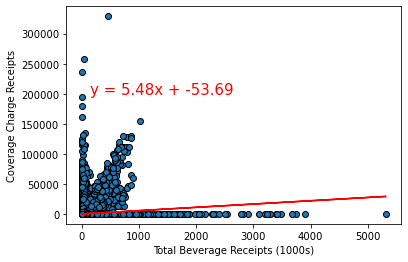

In [26]:
from scipy.stats import linregress

x_axis = df["Total Beverage Receipts (1000s)"]
y_axis = df["Cover Charge Receipts"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, edgecolor="black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(150,200000),fontsize=15,color="red")
# plt.xlim(0,5500000,500000)
plt.xlabel('Total Beverage Receipts (1000s)')
plt.ylabel('Coverage Charge Receipts')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# plt.savefig("BevReceiptsVCoverReceipts2.png")
plt.show()

### Using MatPlotLib

The r-squared is: 0.1501984417096411
The r-squared is: 0.02255957189200446


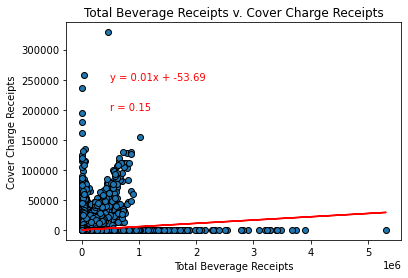

In [28]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept,rvalue, pvalue, stderr) = linregress(receipts_summary_df["Total Beverage Receipts"], receipts_summary_df["Cover Charge Receipts"])
regress_values = receipts_summary_df["Total Beverage Receipts"] * slope + intercept

# Scatter Plot
x_axis = receipts_summary_df["Total Beverage Receipts"]
y_axis = receipts_summary_df["Cover Charge Receipts"]
plt.scatter(x_axis, y_axis, edgecolor="black")

# Regression Line
plt.plot(receipts_summary_df["Total Beverage Receipts"], regress_values, color='red')
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value = f"r = {round(rvalue,2)}"
plt.annotate(line_eq, (500000,250000), color='red', fontsize=10)
plt.annotate(r_value, (500000,200000), color='red', fontsize=10)


# Labels
plt.title("Total Beverage Receipts v. Cover Charge Receipts")
plt.xlabel("Total Beverage Receipts")
plt.ylabel("Cover Charge Receipts")

print(f"The r-squared is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("BevReceiptsVCoverReceipts.png")
plt.show()